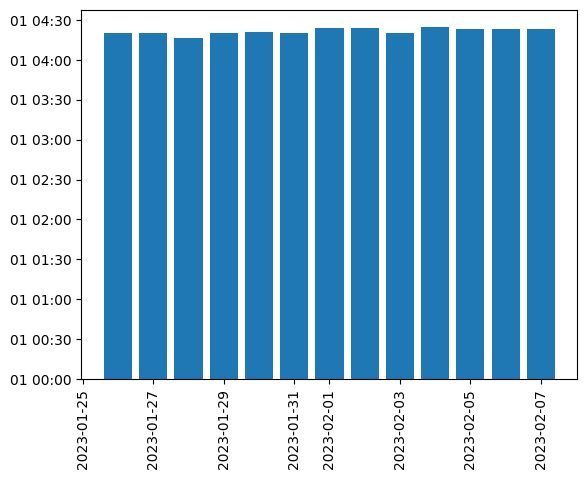

In [6]:
import pandas as pd
import os
from datetime import datetime, timedelta
from matplotlib import pyplot, gridspec

# Execution time for each dataset.

def get_datetime(dataset_name):
    split_dataset_name = dataset_name.split('_')
    year = int(split_dataset_name[2])
    month = int(split_dataset_name[3])
    day = int(split_dataset_name[4])
    hour = int(split_dataset_name[5])
    minute = int(split_dataset_name[6])
    sec = int(split_dataset_name[7])
    return datetime(year=year, month=month, day=day)
    
def get_time_spent(dataset_name):
    split_dataset_name = dataset_name.split('_')
    hours = int(split_dataset_name[8])
    minutes = int(split_dataset_name[9])
    secs = int(split_dataset_name[10].split('.')[0])
    return timedelta(hours=hours, minutes=minutes, seconds=secs)

with os.scandir('../datasets/raw/') as dataset_names:
    data = dict(date_time=list(), time_spent=list())
    for dataset_name in dataset_names:
        new_dt = get_datetime(str(dataset_name))
        data['date_time'].append(new_dt)
        new_time_spent = get_time_spent(str(dataset_name))
        data['time_spent'].append(new_time_spent)
    data_frame = pd.DataFrame(data)
    data_frame['time_spent'] = data_frame['time_spent'] + pd.to_datetime('1970/01/01')
    pyplot.xticks(rotation=90)
    pyplot.bar(data_frame['date_time'], data_frame['time_spent'])

In [7]:
# Table of the datetimes and timedeltas of each dataset.

data_frame['time_spent'] = data_frame['time_spent'] - pd.to_datetime('1970/01/01')
data_frame = data_frame.sort_values('date_time')
data_frame

,date_time,time_spent
1,2023-01-26,0 days 04:20:19
4,2023-01-27,0 days 04:19:46
9,2023-01-28,0 days 04:16:18
12,2023-01-29,0 days 04:20:18
11,2023-01-30,0 days 04:21:04
2,2023-01-31,0 days 04:19:45
7,2023-02-01,0 days 04:23:40
8,2023-02-02,0 days 04:23:26
0,2023-02-03,0 days 04:20:12
10,2023-02-04,0 days 04:24:20


In [8]:
# Total execution time.

data_frame['time_spent'].sum().__str__()

'2 days 08:38:40'

In [9]:
# Mean of all execution times.

data_frame['time_spent'].mean().__str__()

'0 days 04:21:26.153846153'

In [10]:
# Standard deviation of all execution times.

data_frame['time_spent'].std().__str__()

'0 days 00:02:17.284890012'